<a href="https://colab.research.google.com/github/sofiavasqq/Vasquez_Labs/blob/main/Vasquez_Lab_8_Linear_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

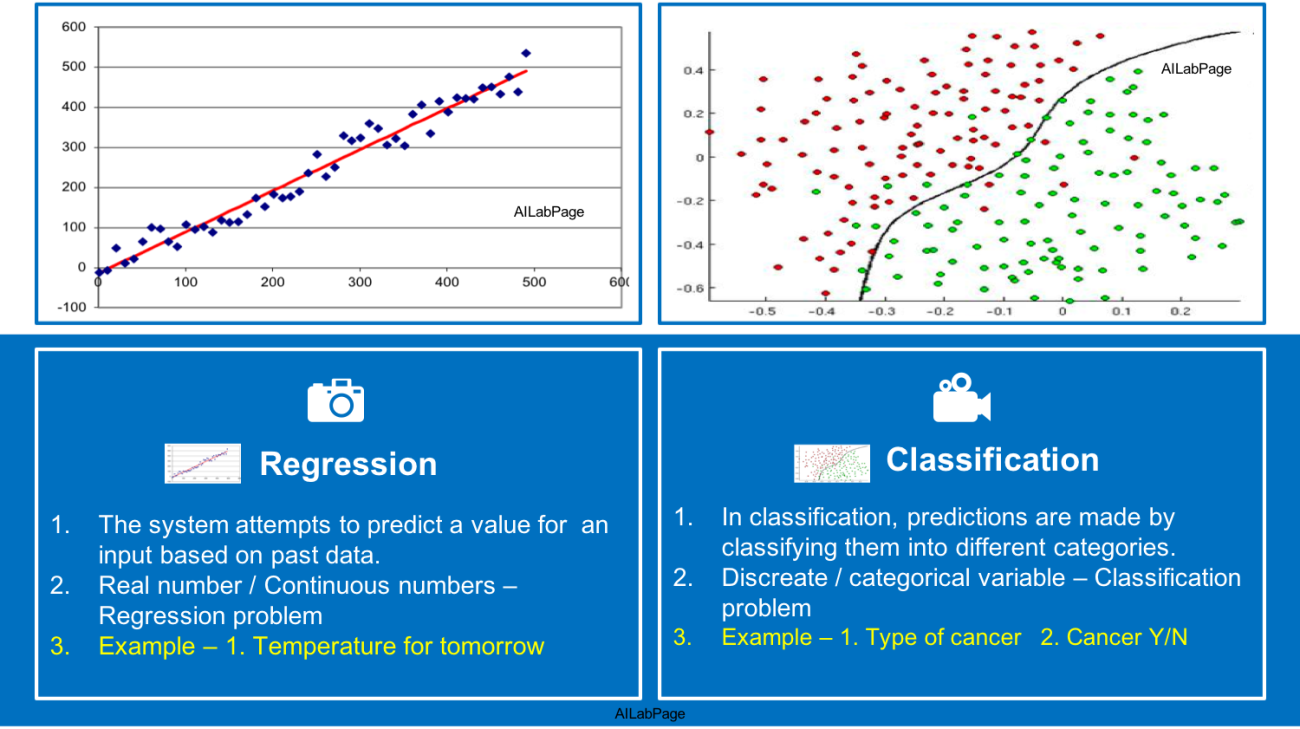

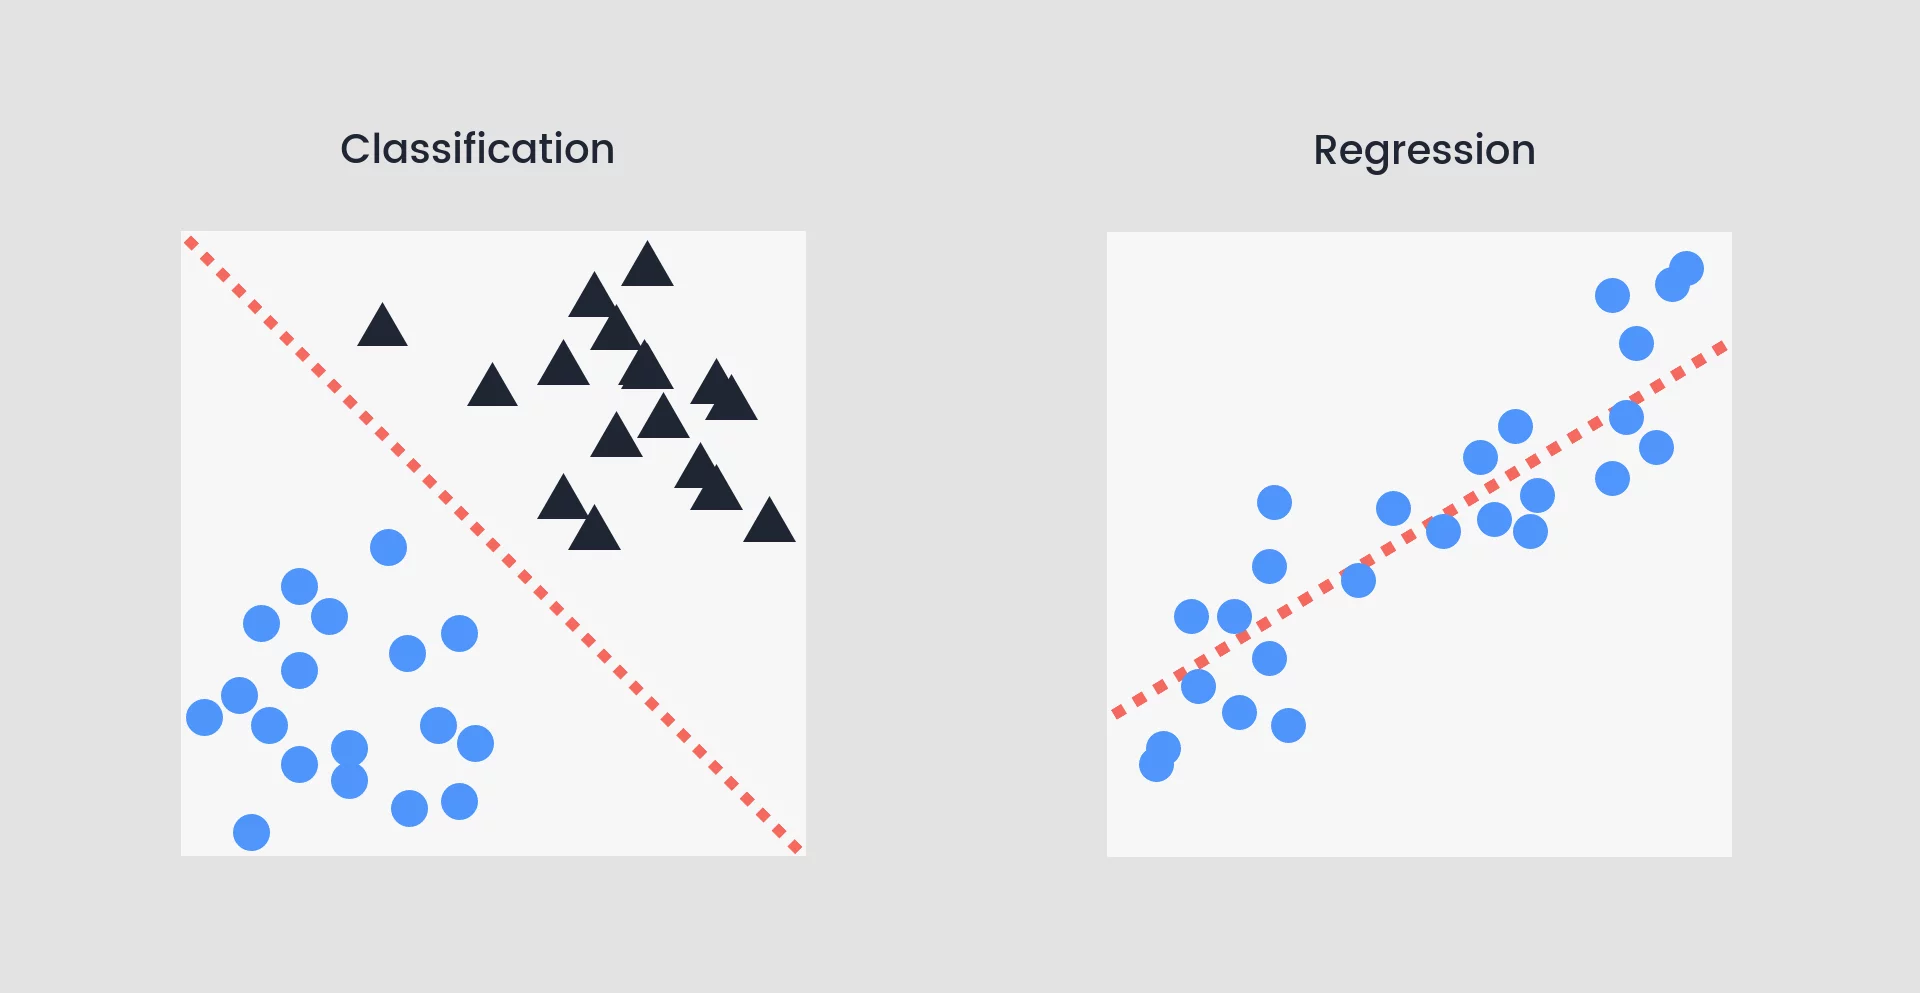

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

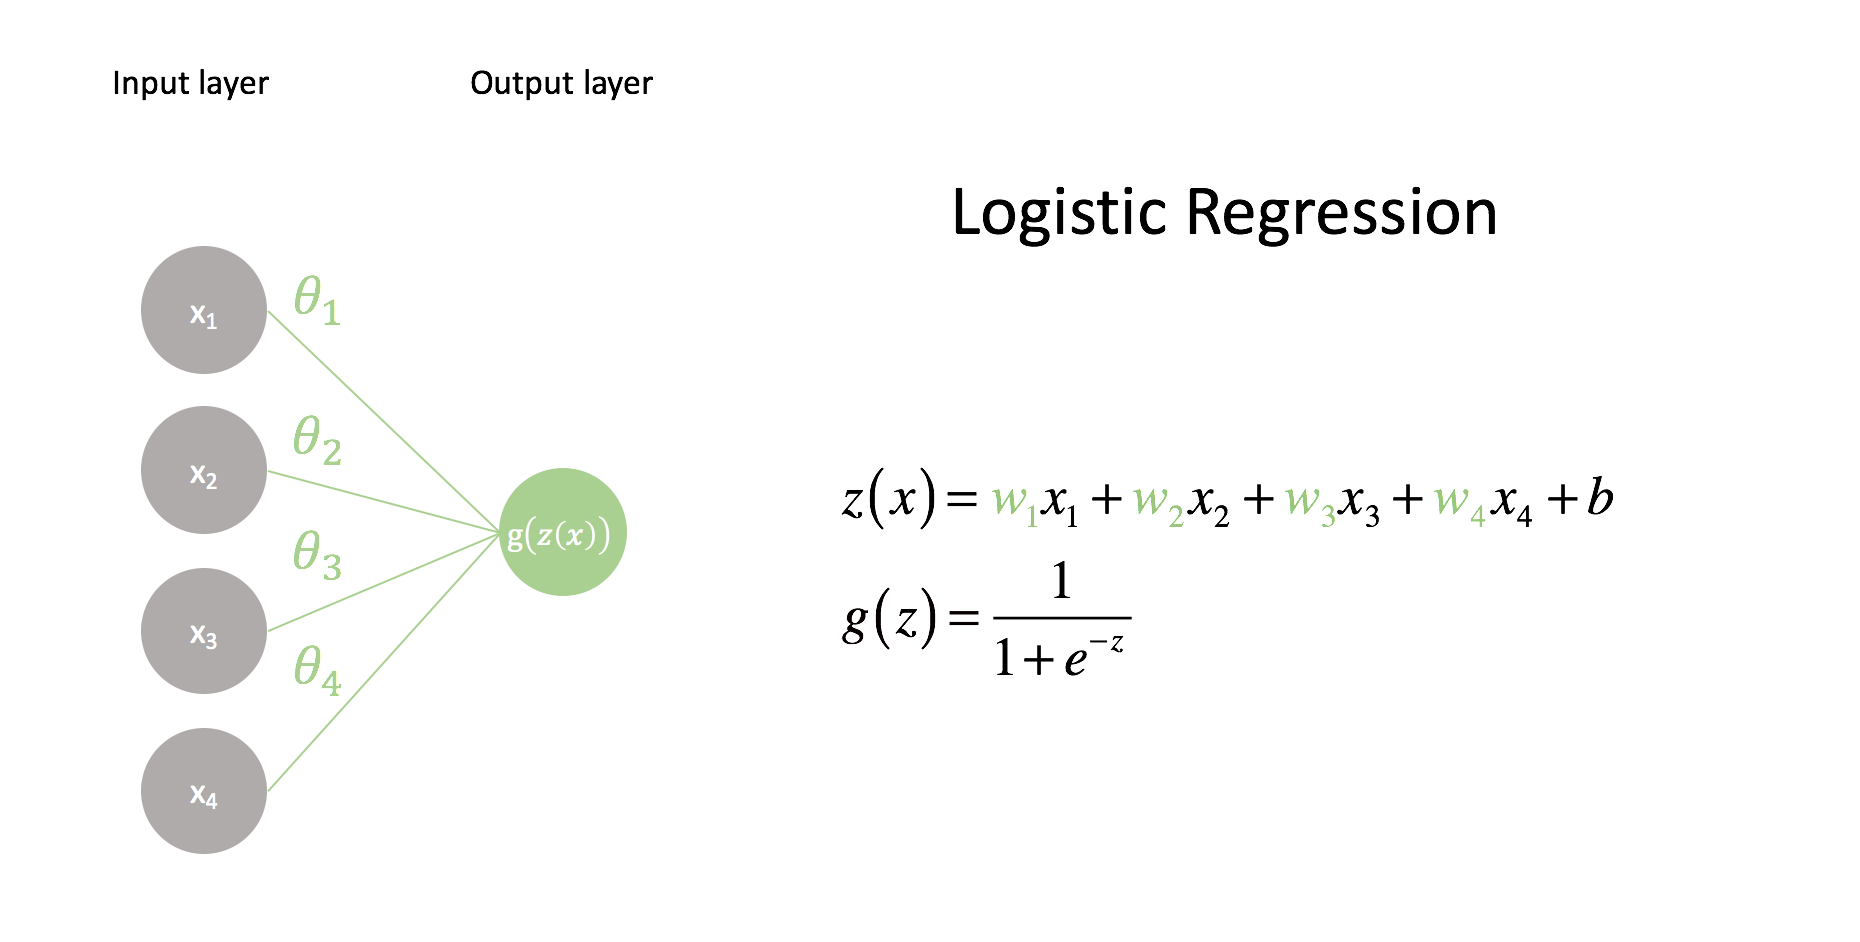

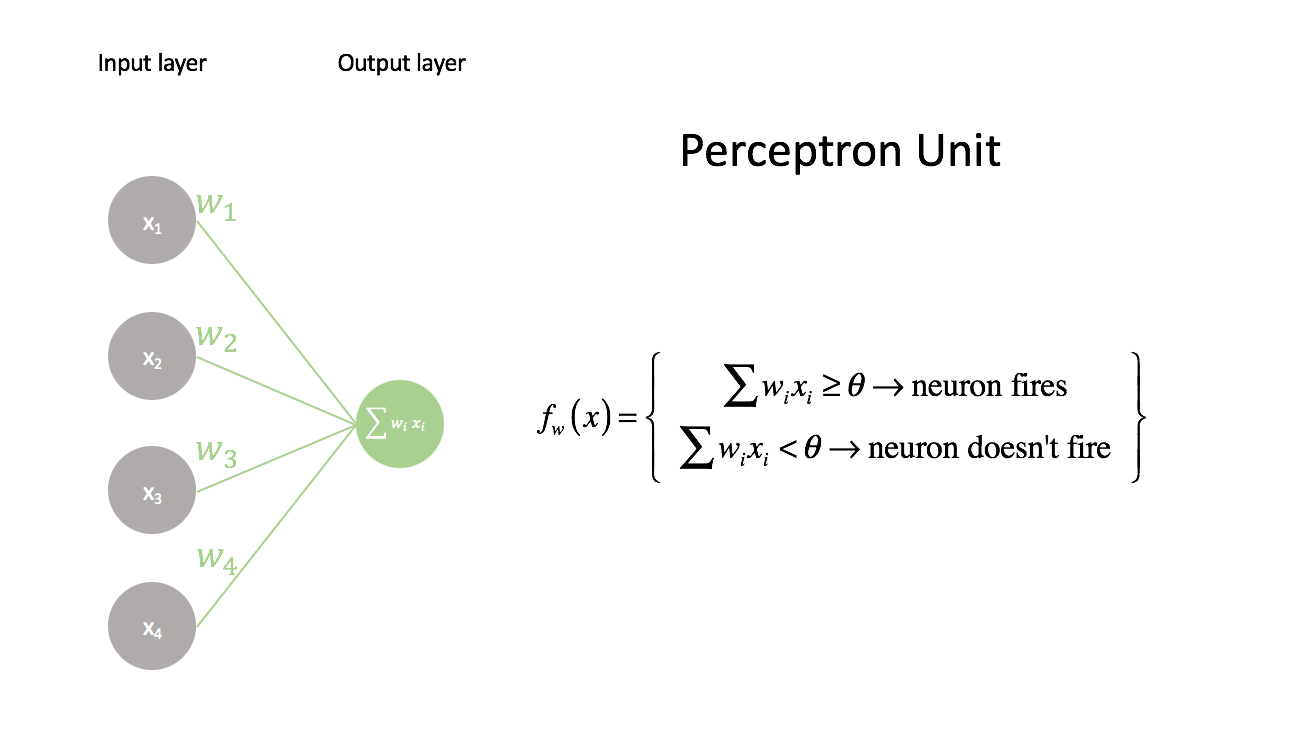

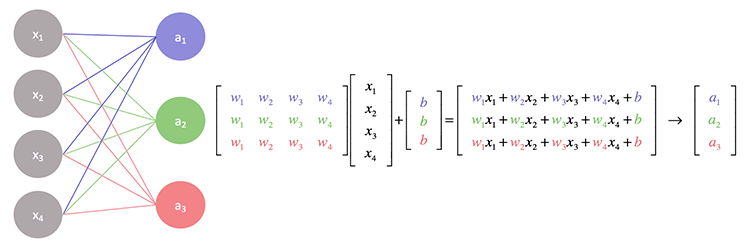

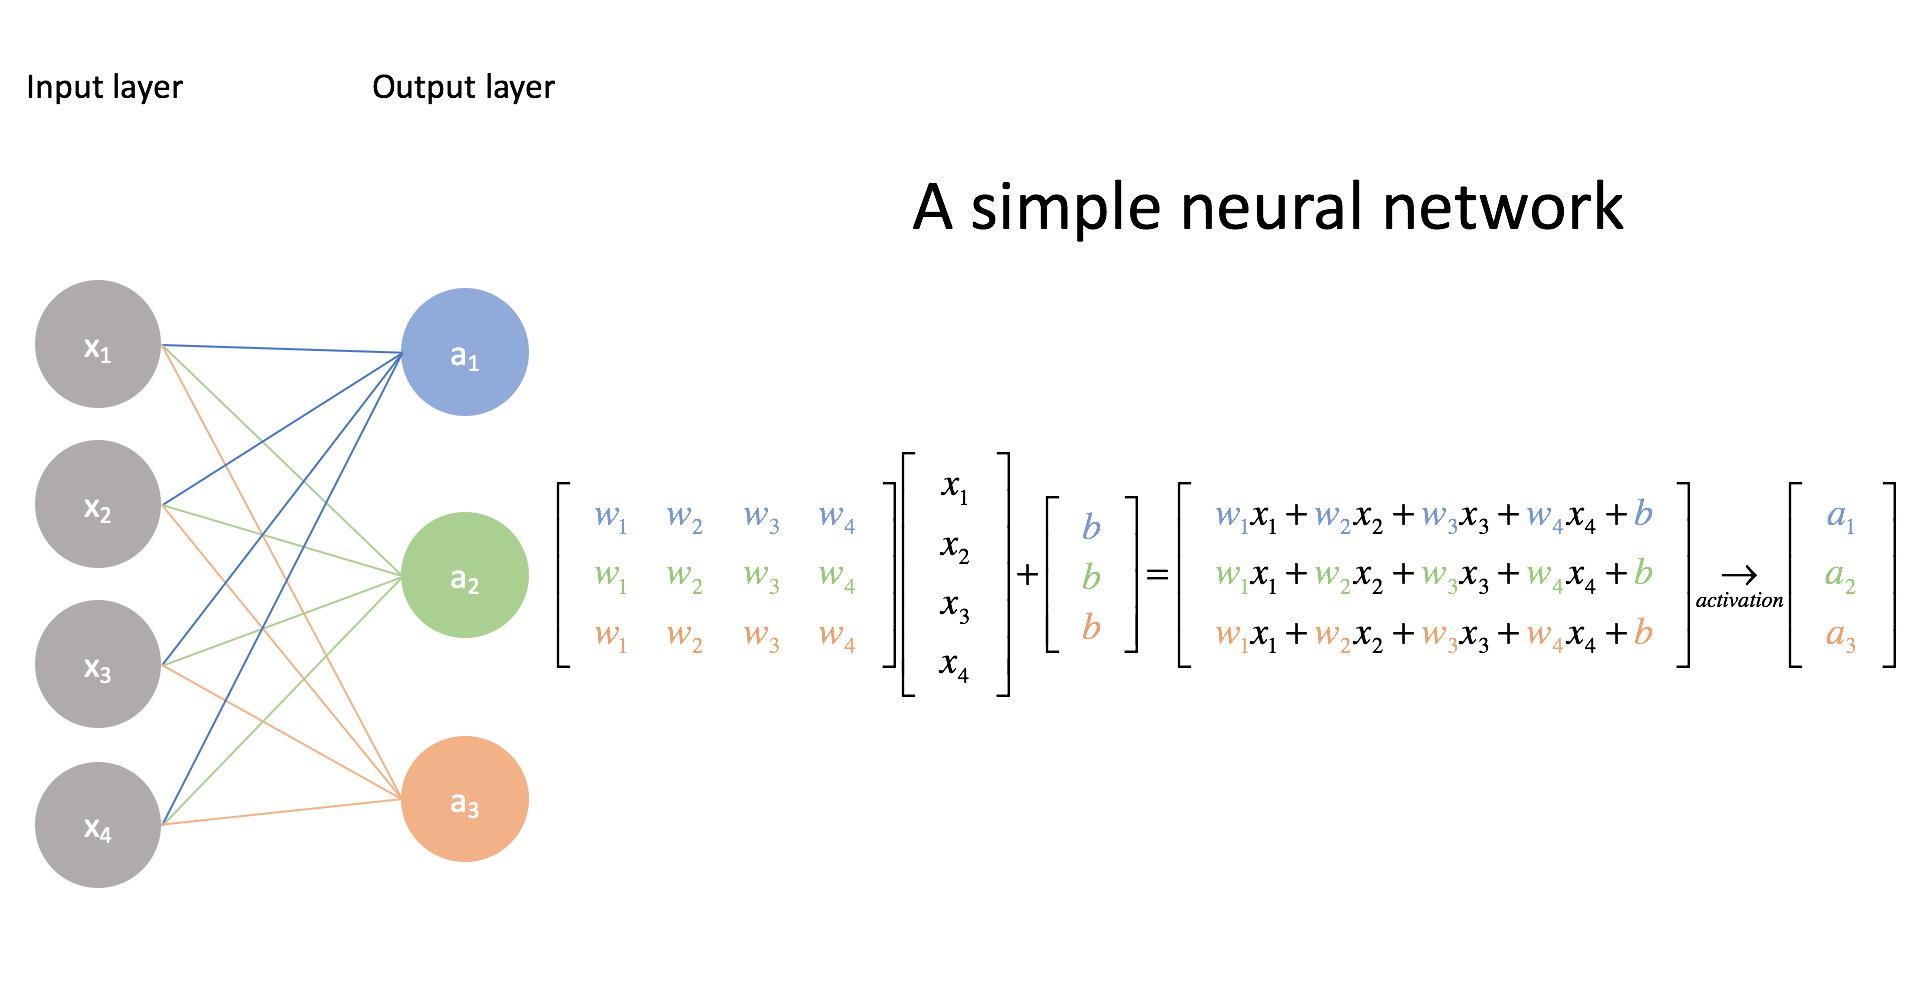

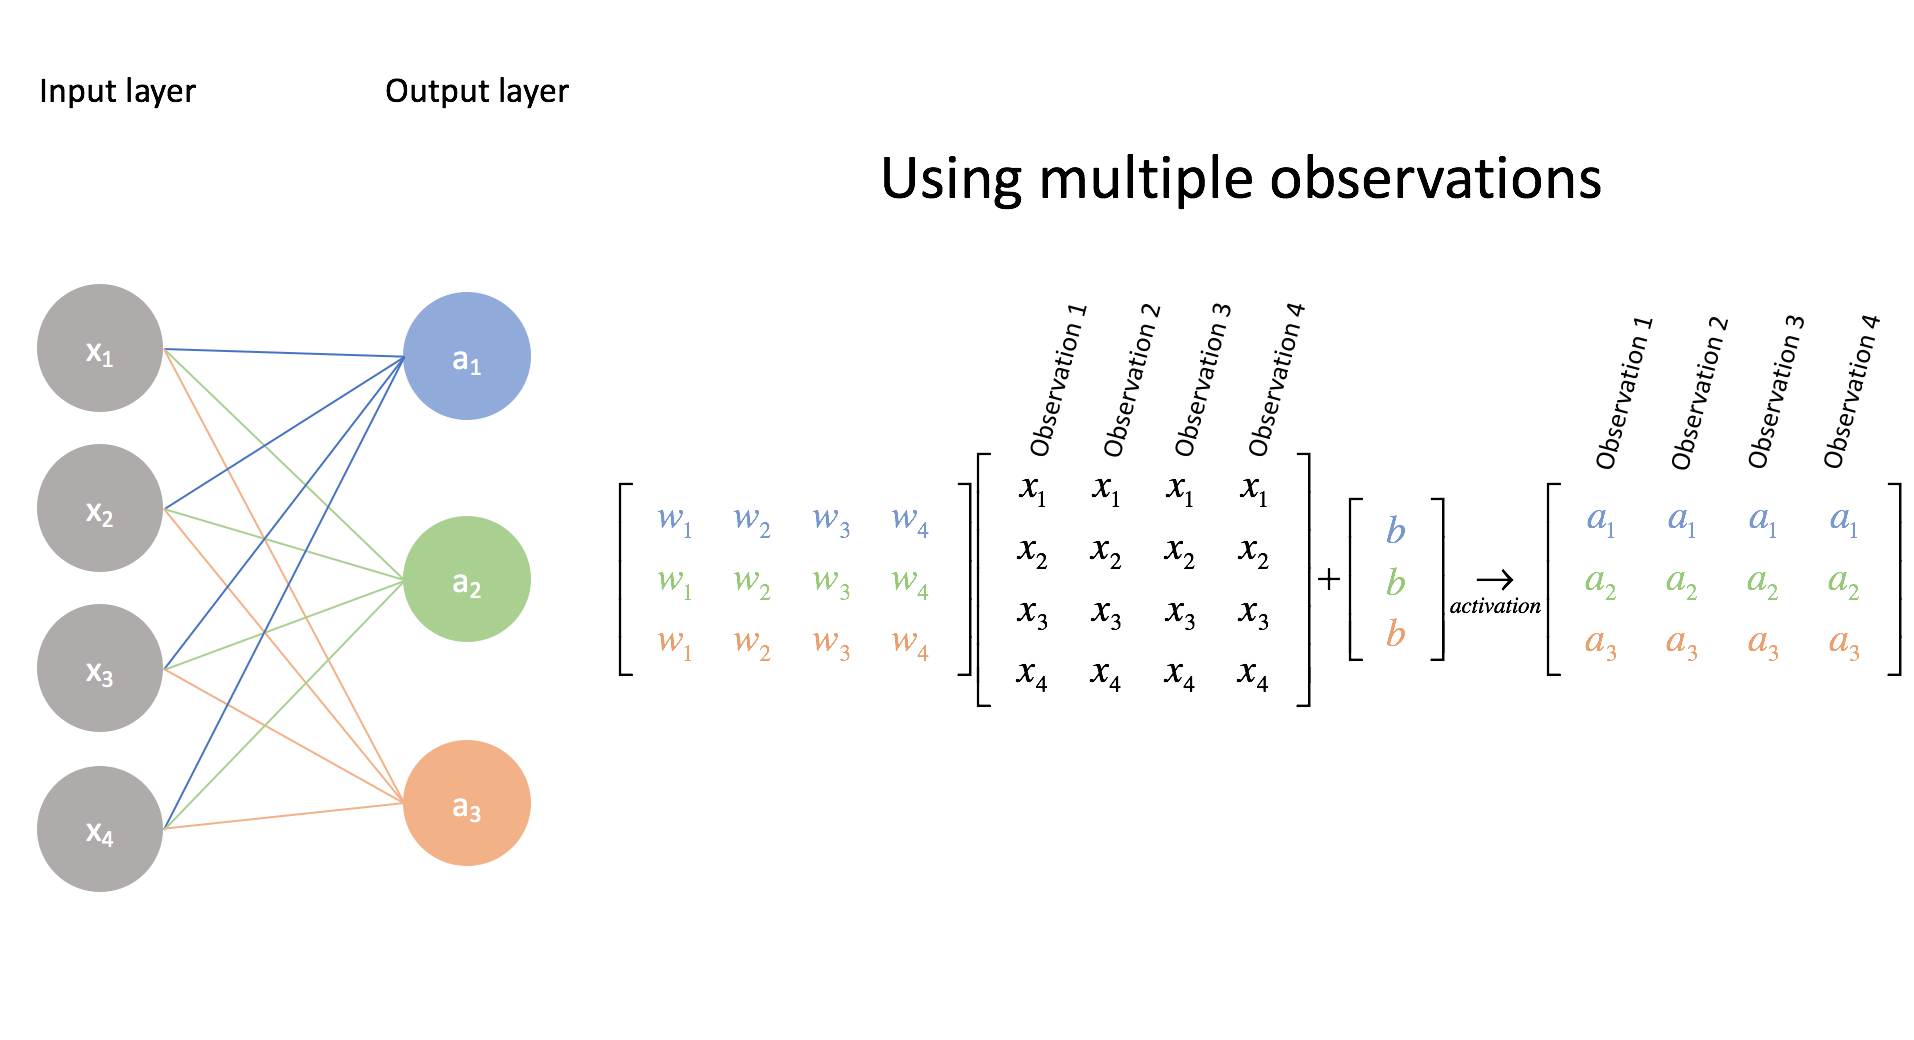

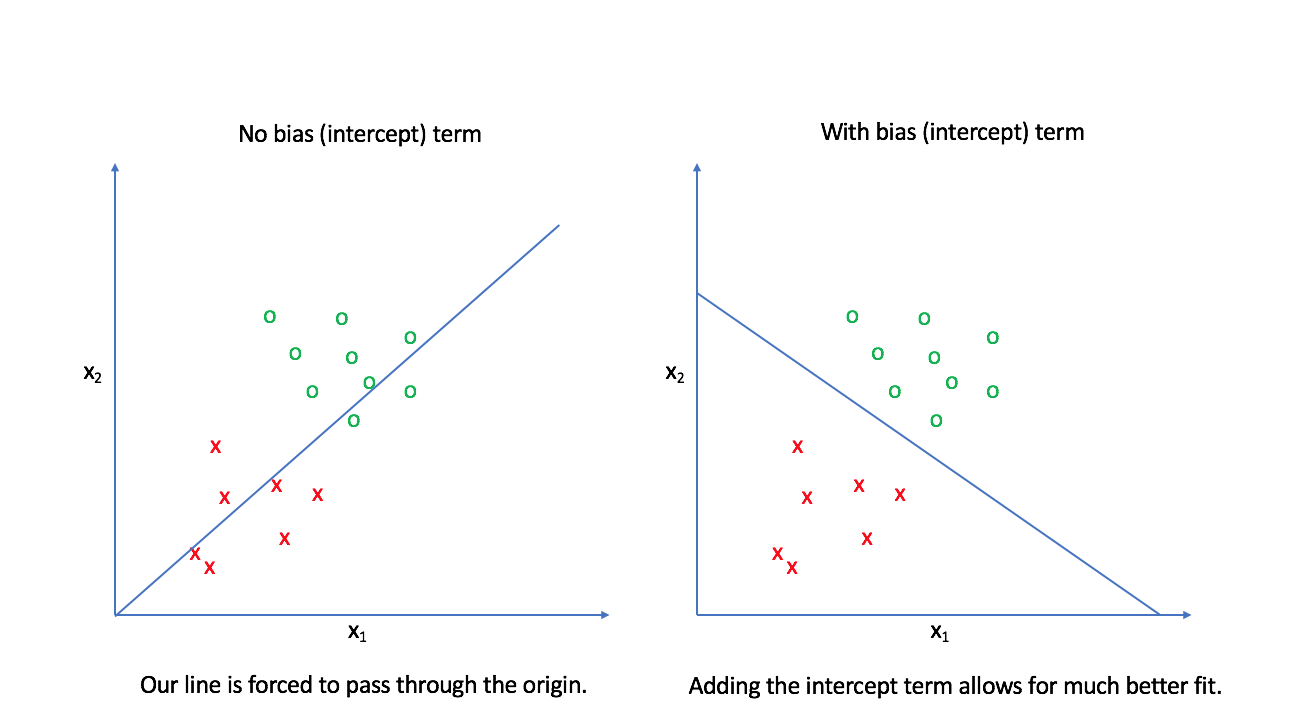

In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import * #imports the files from Hahn's mpcr file on Github
import numpy as np #always start with numpy
import matplotlib.pyplot as plt #used for graphical plotting for images or graphs
!pip install wget
import wget #wget is a convenient solution for dowloading files through the url i am using
import torch #defines mathemeatical equations 
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-q_epqzum
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-q_epqzum


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# $y=mx+b$

In [2]:
x = np.arange(0,9) #creates a array of numbers

In [3]:
x.shape #tells us the size of data we have; how many pixels

(9,)

In [4]:
x = x[:,None] #this makes x whatever the 9 columns of data are

In [5]:
x.shape #tells us the size of data we have; how many pixels

(9, 1)

In [6]:
y = 3*x-5 #y is equal to 3x-5

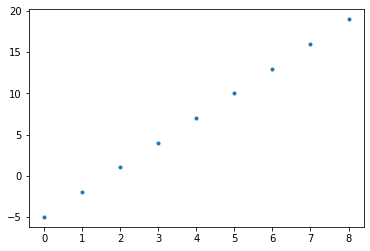

In [7]:
plt.plot(x,y,'.') #graphs the data onto a dotted graph

##Solve Linear Fit Using Pytorch Gradient Descent

In [8]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [9]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [10]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [11]:
for t in range(1000):

    y_pred = m * x + b  # Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item()) #shows results

0 826.0213012695312 0.8550284504890442 0.8817446827888489
1 341.5738830566406 1.306691288948059 0.9303112030029297
2 178.43231201171875 1.5705788135528564 0.9454838037490845
3 123.06170654296875 1.725707769393921 0.941383421421051
4 103.8435287475586 1.8178393840789795 0.9261875748634338
5 96.75724029541016 1.873475432395935 0.9046317934989929
6 93.74651336669922 1.9079639911651611 0.8794581890106201
7 92.10919952392578 1.9301936626434326 0.8522545099258423
8 90.93891906738281 1.945312261581421 0.8239399790763855
9 89.93165588378906 1.956301212310791 0.7950465679168701
10 88.98536682128906 1.964887022972107 0.7658820152282715
11 88.06573486328125 1.9720696210861206 0.7366243004798889
12 87.1612319946289 1.9784282445907593 0.7073760628700256
13 86.26790618896484 1.9842984676361084 0.6781964302062988
14 85.38434600830078 1.9898746013641357 0.6491193771362305
15 84.51007080078125 1.9952691793441772 0.6201642751693726
16 83.6447982788086 2.0005476474761963 0.5913419127464294
17 82.78842163

In [12]:
loss.item() #contains the loss of entire mini-batch, but divided by the batch size

0.003381450427696109

In [13]:
m.item() #the gradient descent

2.9936463832855225

In [14]:
b.item() #the gradient descent

-4.964449405670166

# Pytorch Linear Model

In [15]:
# Hyper-parameters
input_size = 1 # where * means any number of dimensions including none and H_{in} = \text{in\_features}.
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [16]:
# Linear regression model
model = nn.Linear(input_size, output_size) #applies a linear transformation to the incoming data

In [17]:
# Loss and optimizer
criterion = nn.MSELoss() #Creates a criterion that measures the mean squared error (squared L2 norm) between each element in the input x and target y.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  #Implements stochastic gradient descent (optionally with momentum).

In [18]:
# Convert numpy arrays to torch tensors
inputs = x #makes all inputs equal to x
targets = y #makes all targests equal to y

In [19]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item()) #gives the results


1 1000 91.48930358886719
2 1000 29.85721778869629
3 1000 12.344975471496582
4 1000 7.337547302246094
5 1000 5.874701023101807
6 1000 5.4169464111328125
7 1000 5.244543075561523
8 1000 5.1534953117370605
9 1000 5.0859880447387695
10 1000 5.025625228881836
11 1000 4.967757225036621
12 1000 4.911057949066162
13 1000 4.855149745941162
14 1000 4.799918174743652
15 1000 4.745326519012451
16 1000 4.69135856628418
17 1000 4.638006687164307
18 1000 4.585260391235352
19 1000 4.533114433288574
20 1000 4.48156213760376
21 1000 4.430596351623535
22 1000 4.380208969116211
23 1000 4.330394268035889
24 1000 4.2811479568481445
25 1000 4.232459545135498
26 1000 4.184326171875
27 1000 4.136739730834961
28 1000 4.089694499969482
29 1000 4.043184757232666
30 1000 3.997204303741455
31 1000 3.9517452716827393
32 1000 3.9068048000335693
33 1000 3.8623738288879395
34 1000 3.8184497356414795
35 1000 3.775024890899658
36 1000 3.73209285736084
37 1000 3.689650297164917
38 1000 3.6476893424987793
39 1000 3.6062054

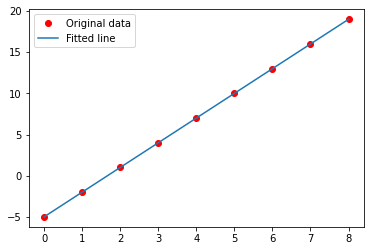

In [20]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data') #plots data and labels it original data
plt.plot(x, predicted, label='Fitted line') 
plt.legend() #gives the graph a legend
plt.show() #shows the graph

In [21]:
model 

Linear(in_features=1, out_features=1, bias=True)

In [22]:
model.weight

Parameter containing:
tensor([[2.9974]], requires_grad=True)

In [23]:
model.bias

Parameter containing:
tensor([-4.9857], requires_grad=True)

In [24]:
def GPU(data): #a specialized processor originally designed to accelerate graphics rendering.
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data): #a specialized processor originally designed to accelerate graphics rendering.
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [25]:
def plot(x): #graphs
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots() #creates a figure and a set of subplots # using the variable ax for single a Axes
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show() #shows the results 

In [26]:
def plotfc(x):#plots
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots() #creates a figure and a set of subplots # using the variable ax for single a Axes
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show() #shows the reesults

In [27]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [28]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))#a specialized processor oriinally designed to accelerate grpahics rendering
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [29]:
# #MNIST
#train_set = datasets.MNIST('./data', train=True, download=True)
#est_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [30]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255 #converts into numpy for us

In [31]:
X.shape #tells us how many examples we have, 28*28 pixels

(60000, 1, 28, 28)

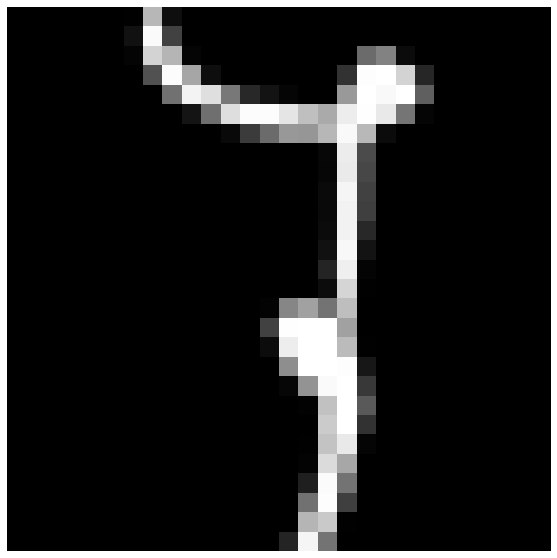

In [32]:
plot(X[123,0,0:28,0:28]) #whatever number is put first is the number of the image in the data set, : is the wildcard for the rows of pixels

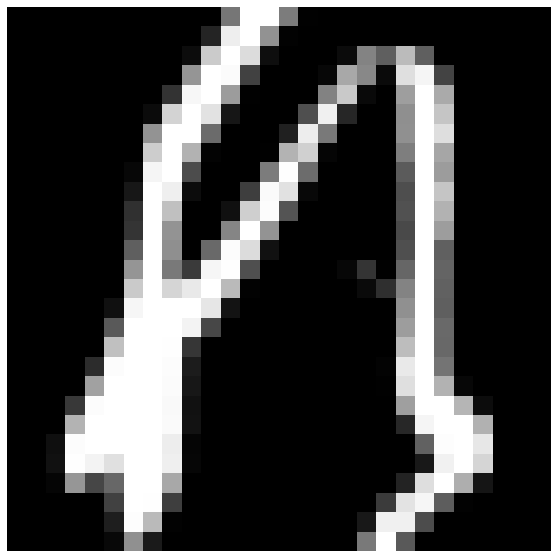

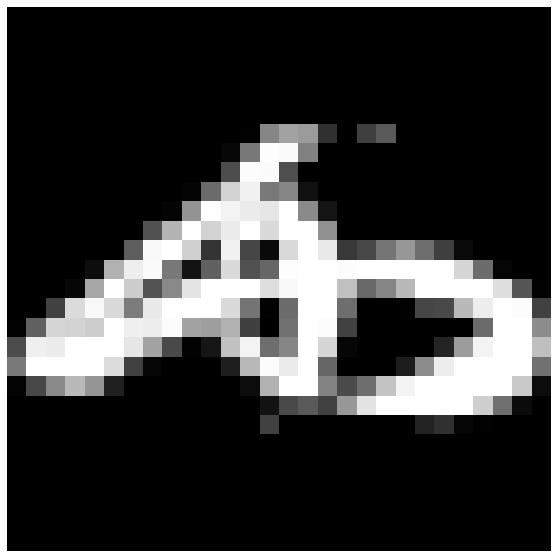

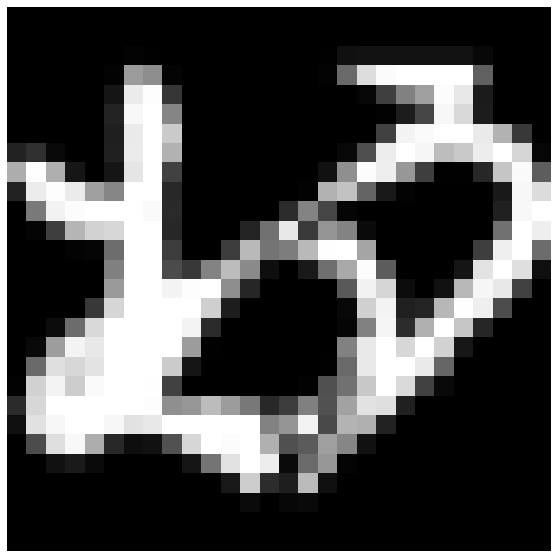

In [33]:
for i in range(3):
    plot(X[i,0,:,:]) #tells the system to show us the first 3 numbers of our dataset
    

In [34]:
Y #prints an array

array([8, 7, 0, ..., 0, 4, 9])

In [35]:
X[0:25,0,:,:].shape #0 takes out the color channel

(25, 28, 28)

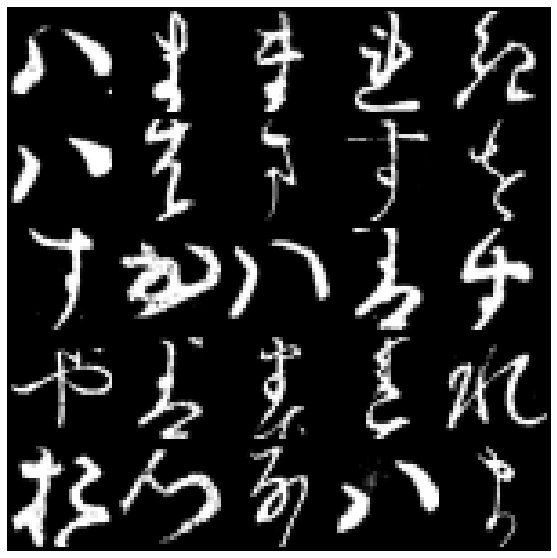

In [36]:
montage_plot(X[125:150,0,:,:]) #shows us a bunch our data at once

In [37]:
X.shape[0] #tells us how many examples we have

60000

In [38]:
X_test.shape #tells us how much data we have

(10000, 1, 28, 28)

In [39]:
X.shape[0] #tells us the first column of data we have

60000

In [40]:
X_test.shape[0]

10000

In [41]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [42]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

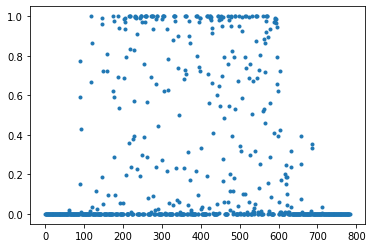

In [43]:
plt.plot(X[100],'.') #puts data on a dotted graph

(array([548.,  11.,  17.,  18.,  15.,  17.,  16.,  14.,  16., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

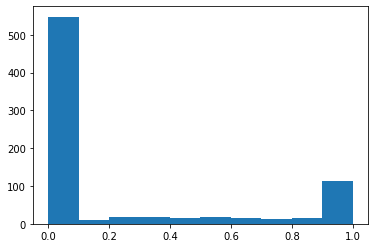

In [44]:
plt.hist(X[0]) #puts data on a histogram

In [45]:
X = GPU_data(X) 
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test) #GPU is a faster and specialized processor originally designed to accelerate graphics rendering

In [46]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data") #retrieves data from the link

'W (2).data'

In [47]:
W = torch.load("W.data") #loads an object saved with torch.save from a file/uses Python's unpickling facilities but treats storages, which underlie tensors, specially

In [48]:
W.shape #tell us how much we have

torch.Size([784, 10])

In [49]:
X.shape #tells us how much we have

torch.Size([60000, 784])

In [50]:
def plot(x): #plots data
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots() #creates a figure and a set of subplots by creating a figure with only one subplot
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show() #shows data on graph 

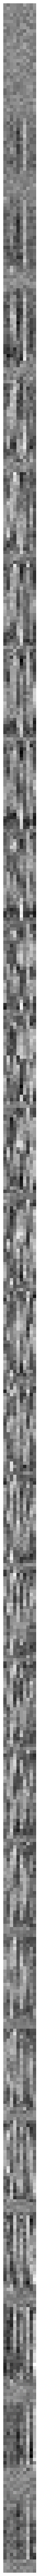

In [51]:
plot(W[0:784,:10]) #shows images

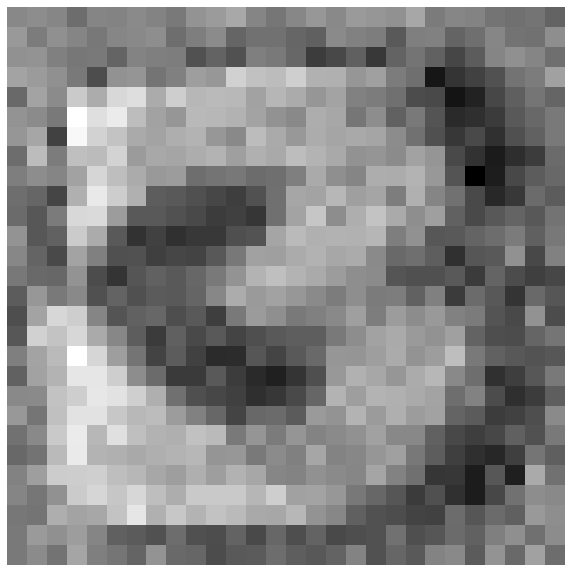

In [52]:
plot(W[:,3].reshape(28,28)) #shows the image with and reshaping it based on the measurements given

In [53]:
X.shape #tells us the size of data we have; how many pixels

torch.Size([60000, 784])

In [54]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [55]:
x,y = get_batch('train') #gives us some of the data

In [56]:
x.shape #tells us the size of data we have; how many pixels

torch.Size([1000, 784])

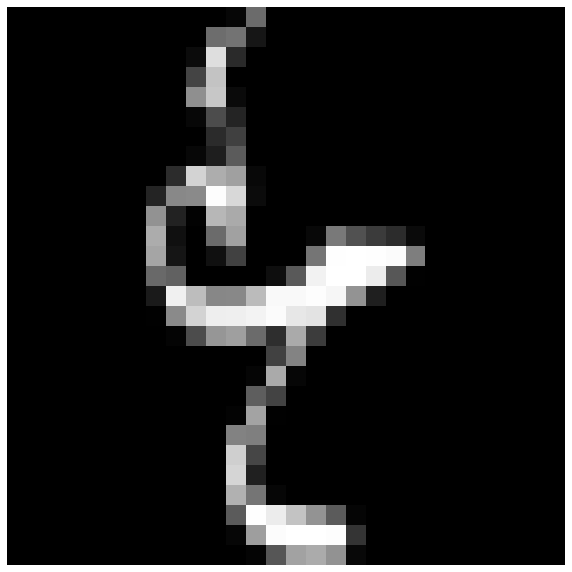

In [57]:
plot(x[0].reshape(28,28)) #reshapes image to be 28*28

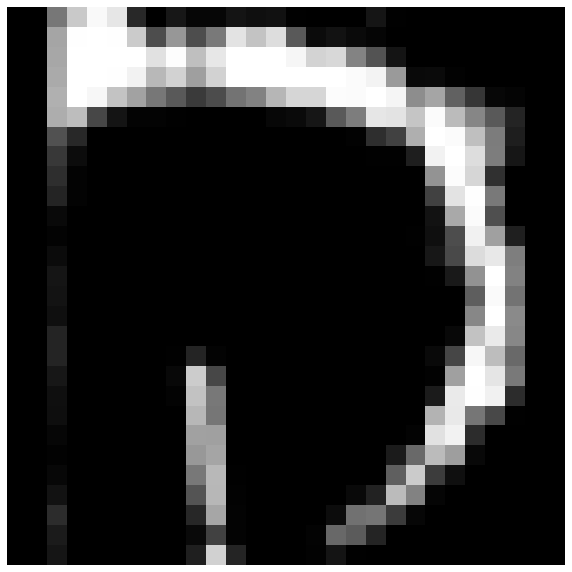

In [58]:
plot(x[1].reshape(28,28)) #reshapes image to be 28*28

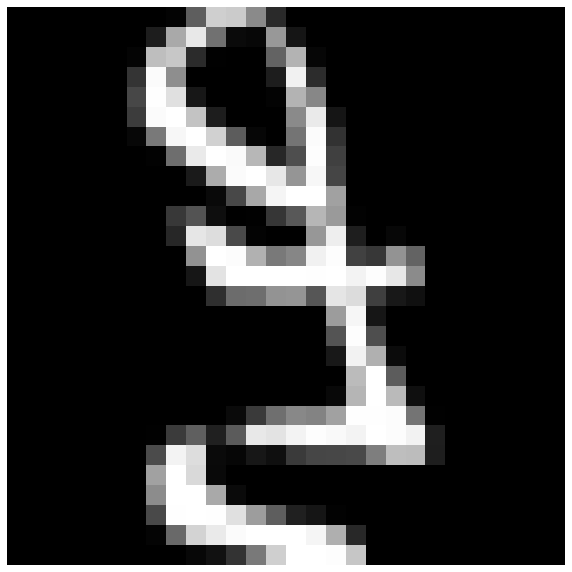

In [59]:
plot(x[2].reshape(28,28)) #reshapes image to be 28*28

In [60]:
y #list of all the answers

tensor([2., 3., 1., 1., 0., 0., 7., 9., 5., 3., 6., 5., 6., 4., 6., 8., 4., 9.,
        7., 7., 7., 2., 0., 9., 9., 9., 5., 8., 1., 0., 7., 9., 1., 9., 1., 9.,
        9., 1., 4., 7., 7., 2., 9., 6., 8., 4., 5., 2., 8., 5., 3., 2., 0., 9.,
        6., 5., 5., 8., 6., 9., 6., 0., 1., 0., 0., 7., 0., 5., 1., 4., 4., 5.,
        9., 0., 3., 8., 2., 9., 0., 3., 5., 2., 5., 8., 4., 7., 6., 9., 4., 2.,
        5., 7., 2., 6., 3., 4., 4., 5., 2., 7., 6., 9., 1., 1., 4., 4., 2., 4.,
        3., 4., 0., 8., 1., 1., 0., 3., 8., 2., 3., 3., 7., 3., 0., 4., 8., 1.,
        1., 5., 4., 4., 1., 2., 6., 5., 0., 3., 4., 0., 2., 7., 1., 4., 6., 6.,
        1., 6., 3., 2., 4., 9., 9., 8., 5., 0., 2., 4., 9., 8., 1., 1., 1., 0.,
        0., 7., 3., 3., 3., 0., 9., 5., 9., 5., 0., 9., 9., 1., 0., 5., 1., 6.,
        6., 8., 2., 2., 0., 4., 0., 7., 2., 6., 7., 1., 4., 1., 0., 7., 9., 5.,
        4., 7., 1., 9., 2., 9., 2., 3., 7., 3., 4., 3., 3., 2., 1., 1., 8., 7.,
        3., 4., 3., 7., 6., 4., 4., 3., 

In [61]:
x.shape, W.shape #x is our data which is 1000 images as a list of numbers, the 784 tells us our inputs; if the inside numbers match we can run matmul

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [62]:
torch.matmul(x,W).shape #the inside dimenstions cancel out

torch.Size([1000, 10])

In [63]:
(x@W).shape #tells us the amount of pixels we currently have

torch.Size([1000, 10])

In [64]:
%%timeit
x@W #the @ is a shortcut that does the same thing as matrix multiple(matmul)

41.4 µs ± 5.35 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [65]:
X@W #the @ is a shortcut that does the same thing as matrix multiple

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

https://eleif.net/clicktimer.html

In [66]:
x@W

tensor([[ -8.9148,  -9.4925,  -4.3957,  ...,   1.0442,  -0.1963,   6.9892],
        [ -6.5615, -17.6635,  -0.8545,  ..., -19.3115, -12.9534, -25.0981],
        [-11.5768, -18.1042,  -6.3288,  ...,   0.6637, -10.7403,   0.4958],
        ...,
        [ -2.6003,  -6.6103,   4.4344,  ..., -20.8143,  -4.4058, -18.0259],
        [ -0.0603, -31.9074,   2.8541,  ...,  -7.3643, -12.6012,  -5.3020],
        [-10.7697, -25.3895,  -0.0790,  ..., -13.2945, -14.3392, -20.4176]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [67]:
y2 = x@W #uses more numbers

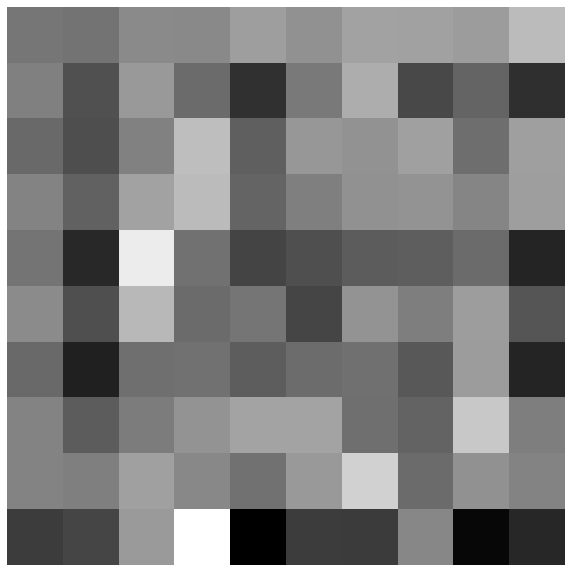

In [68]:
plot(y2[0:10,:])  #shows 10 columns worth of pixels

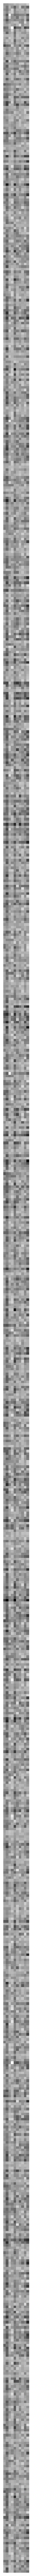

In [69]:
plot(y2) #shows image

In [70]:
y

tensor([2., 3., 1., 1., 0., 0., 7., 9., 5., 3., 6., 5., 6., 4., 6., 8., 4., 9.,
        7., 7., 7., 2., 0., 9., 9., 9., 5., 8., 1., 0., 7., 9., 1., 9., 1., 9.,
        9., 1., 4., 7., 7., 2., 9., 6., 8., 4., 5., 2., 8., 5., 3., 2., 0., 9.,
        6., 5., 5., 8., 6., 9., 6., 0., 1., 0., 0., 7., 0., 5., 1., 4., 4., 5.,
        9., 0., 3., 8., 2., 9., 0., 3., 5., 2., 5., 8., 4., 7., 6., 9., 4., 2.,
        5., 7., 2., 6., 3., 4., 4., 5., 2., 7., 6., 9., 1., 1., 4., 4., 2., 4.,
        3., 4., 0., 8., 1., 1., 0., 3., 8., 2., 3., 3., 7., 3., 0., 4., 8., 1.,
        1., 5., 4., 4., 1., 2., 6., 5., 0., 3., 4., 0., 2., 7., 1., 4., 6., 6.,
        1., 6., 3., 2., 4., 9., 9., 8., 5., 0., 2., 4., 9., 8., 1., 1., 1., 0.,
        0., 7., 3., 3., 3., 0., 9., 5., 9., 5., 0., 9., 9., 1., 0., 5., 1., 6.,
        6., 8., 2., 2., 0., 4., 0., 7., 2., 6., 7., 1., 4., 1., 0., 7., 9., 5.,
        4., 7., 1., 9., 2., 9., 2., 3., 7., 3., 4., 3., 3., 2., 1., 1., 8., 7.,
        3., 4., 3., 7., 6., 4., 4., 3., 

In [71]:
one_hot(y)

<ipython-input-24-c7b31a06437c>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

<ipython-input-24-c7b31a06437c>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


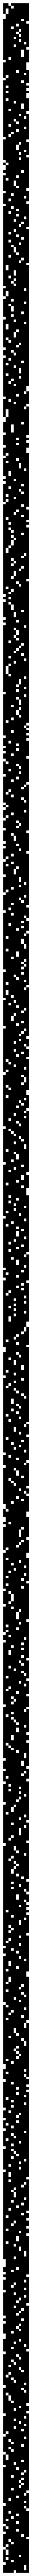

In [72]:
plot(one_hot(y)) #shows what it is

<ipython-input-24-c7b31a06437c>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


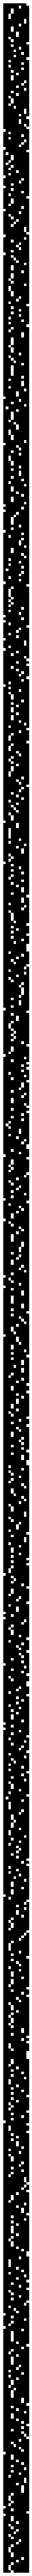

In [73]:
plot(one_hot(torch.argmax(y2,1))) #fills in one at a time

In [74]:
y

tensor([2., 3., 1., 1., 0., 0., 7., 9., 5., 3., 6., 5., 6., 4., 6., 8., 4., 9.,
        7., 7., 7., 2., 0., 9., 9., 9., 5., 8., 1., 0., 7., 9., 1., 9., 1., 9.,
        9., 1., 4., 7., 7., 2., 9., 6., 8., 4., 5., 2., 8., 5., 3., 2., 0., 9.,
        6., 5., 5., 8., 6., 9., 6., 0., 1., 0., 0., 7., 0., 5., 1., 4., 4., 5.,
        9., 0., 3., 8., 2., 9., 0., 3., 5., 2., 5., 8., 4., 7., 6., 9., 4., 2.,
        5., 7., 2., 6., 3., 4., 4., 5., 2., 7., 6., 9., 1., 1., 4., 4., 2., 4.,
        3., 4., 0., 8., 1., 1., 0., 3., 8., 2., 3., 3., 7., 3., 0., 4., 8., 1.,
        1., 5., 4., 4., 1., 2., 6., 5., 0., 3., 4., 0., 2., 7., 1., 4., 6., 6.,
        1., 6., 3., 2., 4., 9., 9., 8., 5., 0., 2., 4., 9., 8., 1., 1., 1., 0.,
        0., 7., 3., 3., 3., 0., 9., 5., 9., 5., 0., 9., 9., 1., 0., 5., 1., 6.,
        6., 8., 2., 2., 0., 4., 0., 7., 2., 6., 7., 1., 4., 1., 0., 7., 9., 5.,
        4., 7., 1., 9., 2., 9., 2., 3., 7., 3., 4., 3., 3., 2., 1., 1., 8., 7.,
        3., 4., 3., 7., 6., 4., 4., 3., 

In [75]:
torch.argmax(y2,1) #Returns the indices of the maximum values along an axis.

tensor([9, 6, 3, 3, 2, 2, 8, 8, 6, 3, 3, 5, 5, 2, 3, 9, 3, 6, 4, 7, 4, 9, 2, 7,
        2, 7, 3, 5, 3, 3, 8, 7, 5, 8, 3, 5, 2, 3, 3, 2, 4, 8, 8, 6, 9, 6, 6, 8,
        9, 0, 2, 7, 2, 8, 7, 6, 0, 9, 1, 3, 3, 2, 1, 3, 2, 5, 2, 0, 7, 6, 3, 0,
        3, 7, 2, 9, 3, 3, 2, 7, 0, 6, 2, 3, 5, 4, 3, 8, 8, 9, 0, 8, 3, 6, 5, 6,
        3, 0, 3, 4, 5, 8, 3, 3, 7, 3, 3, 2, 3, 8, 2, 2, 3, 3, 6, 5, 2, 9, 3, 6,
        3, 6, 2, 7, 2, 9, 3, 2, 7, 7, 3, 3, 3, 2, 3, 3, 6, 2, 3, 4, 7, 3, 3, 3,
        3, 7, 2, 7, 7, 2, 8, 5, 5, 0, 6, 3, 8, 1, 5, 3, 3, 3, 2, 4, 5, 5, 2, 2,
        3, 3, 8, 0, 5, 6, 3, 6, 2, 2, 3, 3, 6, 3, 6, 6, 3, 7, 2, 8, 3, 3, 5, 7,
        3, 3, 8, 0, 7, 0, 5, 4, 3, 3, 3, 6, 3, 0, 7, 2, 7, 6, 6, 8, 3, 3, 7, 8,
        2, 6, 2, 7, 1, 7, 6, 2, 6, 0, 9, 3, 2, 2, 2, 3, 2, 3, 2, 7, 2, 6, 0, 7,
        0, 2, 9, 6, 5, 2, 5, 0, 8, 8, 2, 0, 5, 3, 8, 9, 5, 9, 3, 5, 7, 6, 9, 7,
        2, 0, 2, 6, 2, 3, 3, 7, 3, 5, 3, 3, 5, 3, 3, 6, 8, 2, 9, 6, 3, 2, 2, 9,
        3, 2, 2, 5, 6, 3, 2, 3, 5, 3, 3,

In [76]:
torch.sum(y == torch.argmax(y2,1))/b #Returns the sum of all elements in the input tensor.

tensor(0.0690, device='cuda:0')

In [77]:
X.shape #tells us the size of data we have; how many pixels

torch.Size([60000, 784])

In [78]:
X@W #shortcut

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [79]:
torch.argmax(X@W,1) ##Returns the indices of the maximum values along an axis.

tensor([5, 2, 3,  ..., 2, 2, 5], device='cuda:0')

In [80]:
Y

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [81]:
torch.sum(torch.argmax(X@W,1) == Y)/60000  #Returns the sum of all elements in the input tensor.

tensor(0.0789, device='cuda:0')

In [82]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [83]:
W.shape #tells us how many pixels

torch.Size([784, 10])

In [84]:
W[:,0].shape #te;;s us how large it is in either rows or colunns

torch.Size([784])

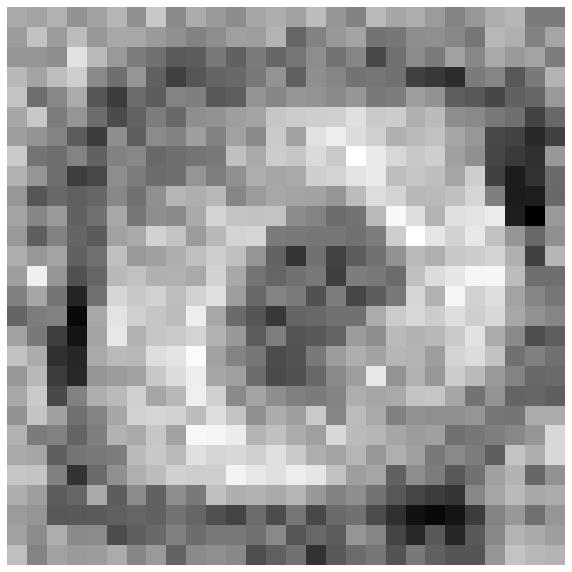

In [85]:
plot(W[:,0].reshape(28,28)) #reshapes and shows image

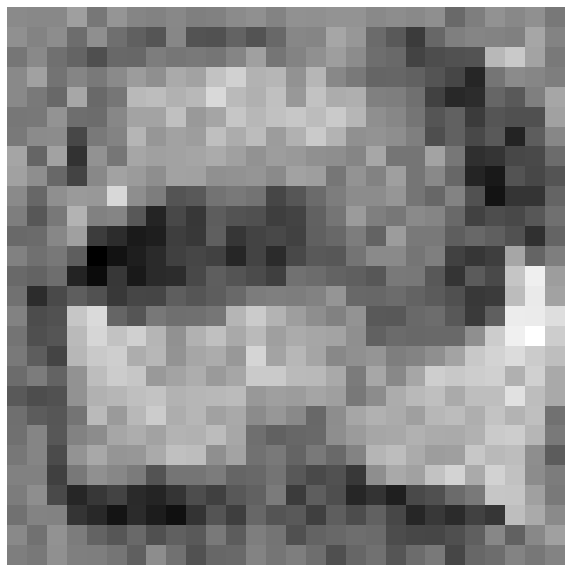

In [86]:
plot(W[:,2].reshape(28,28)) #reshapes and shows image

In [87]:
W.shape #tells us how many pixels

torch.Size([784, 10])

In [88]:
(W.T).shape #tells us how many pixels does the image compose of

torch.Size([10, 784])

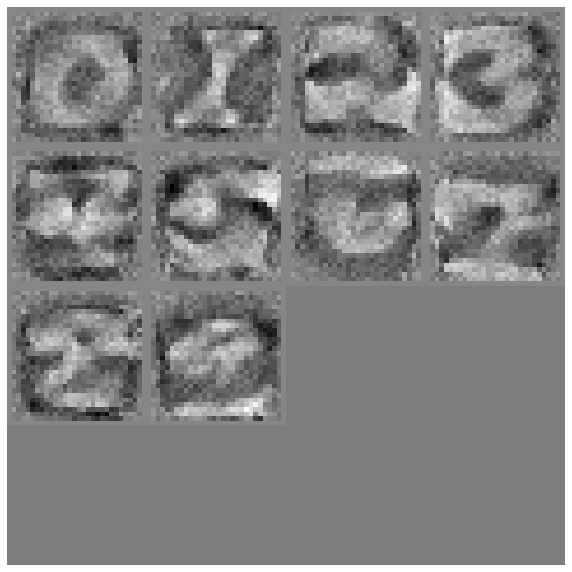

In [89]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy()) #plots a montage

In [90]:
###################################################

In [91]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'> #shows image from url

In [92]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'> #shows image from url

In [93]:
def softmax(x): # transforms each element of a collection by computing the exponential of each element divided by the sum of the exponentials of all the elements.
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [94]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [95]:
%%html
<img src ='https://i.stack.imgur.com/fXqXs.png'> #shows image from url

In [96]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [97]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [98]:
def acc(out,y): #measures where in the output could you get the maxinmum output
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [99]:
X.shape #tells us the size of data we have; how many pixels

torch.Size([60000, 784])

In [100]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [101]:
def model(x,w):

    return x@w[0]

In [102]:
def make_plots(): #does exactly what the code says, makes plots
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: sofiavasqq. Use `wandb login --relogin` to force relogin


<ipython-input-24-c7b31a06437c>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


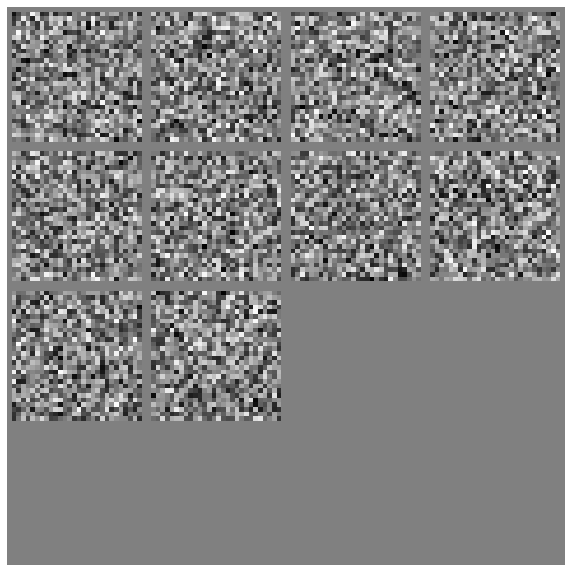

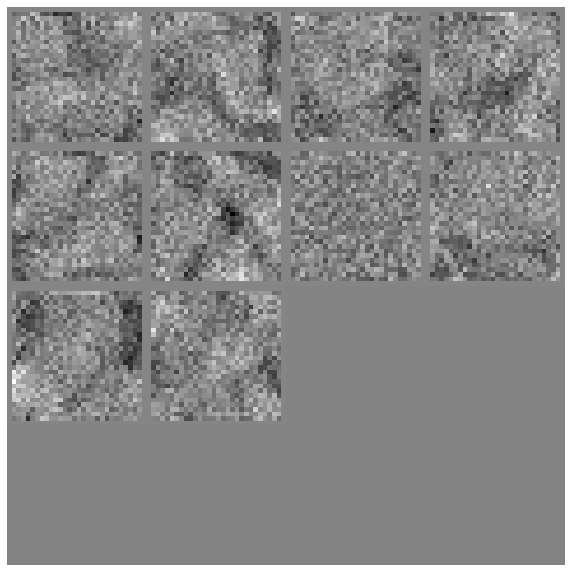

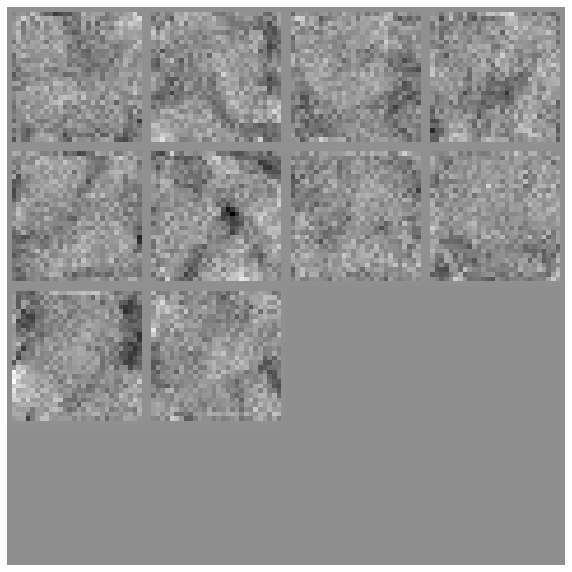

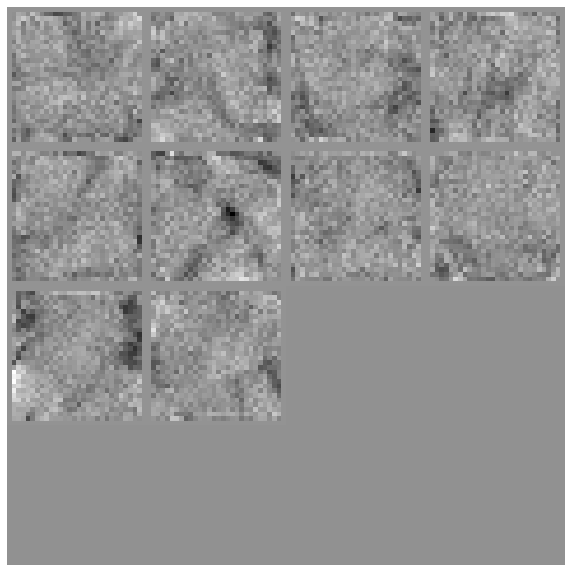

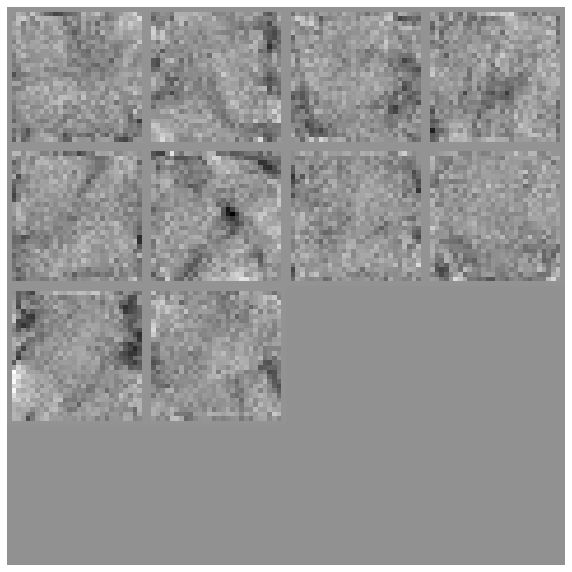

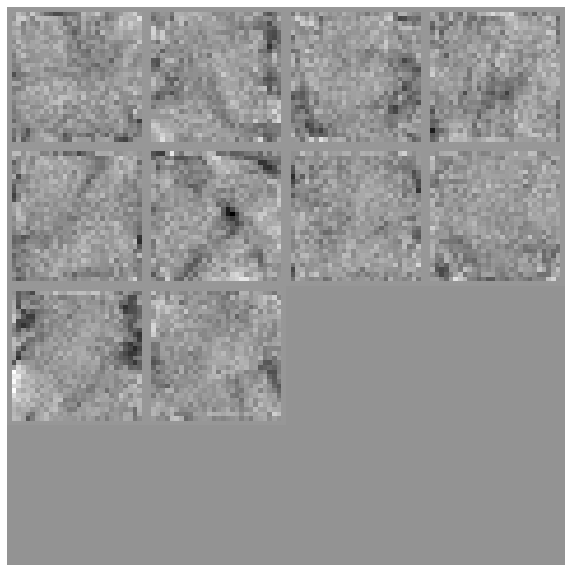

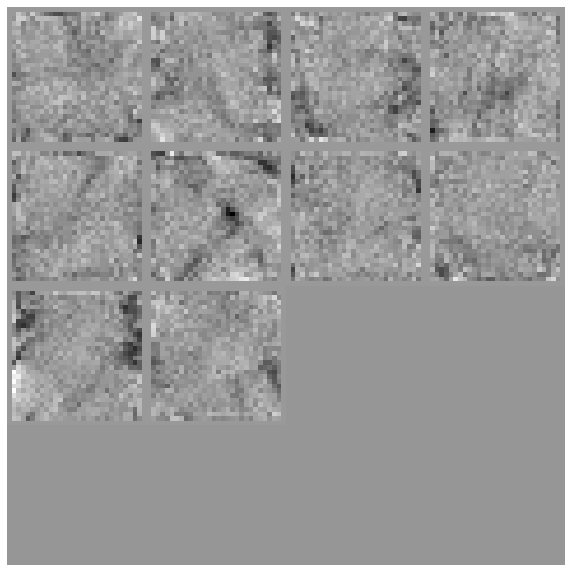

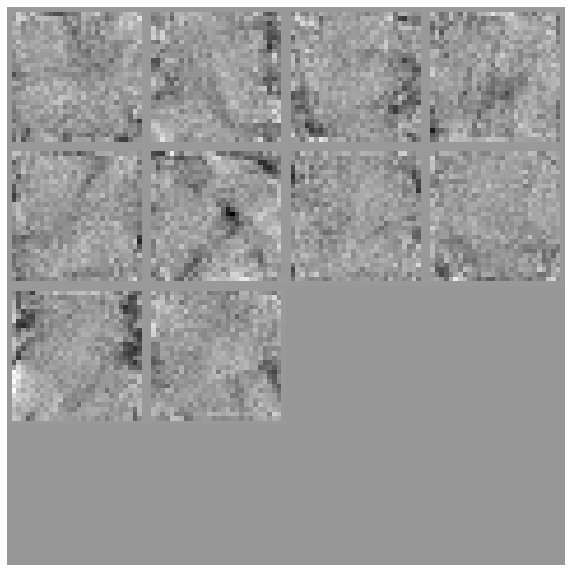

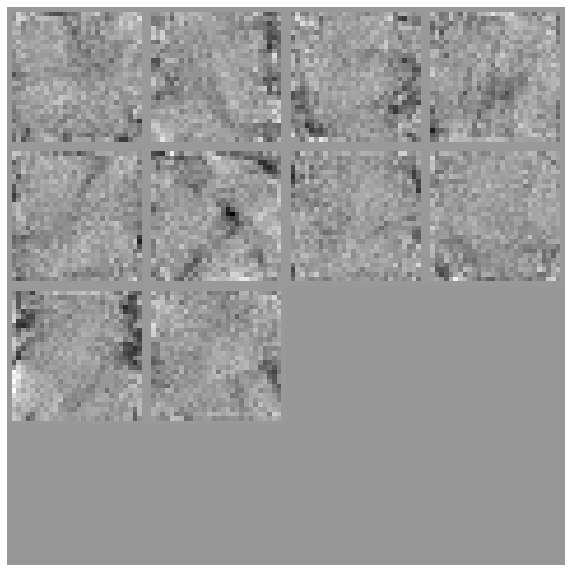

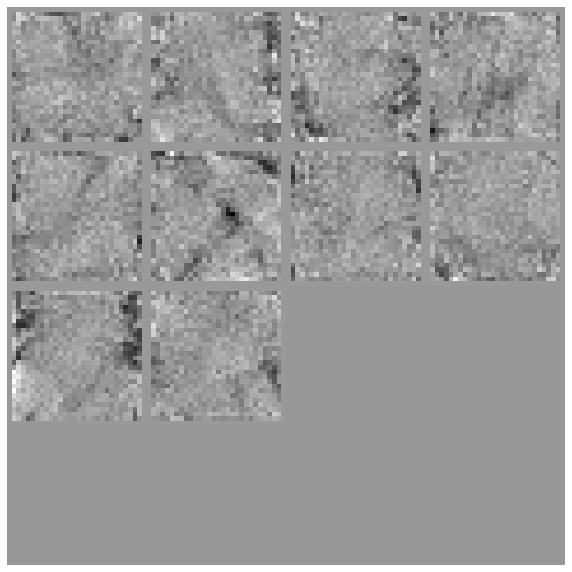

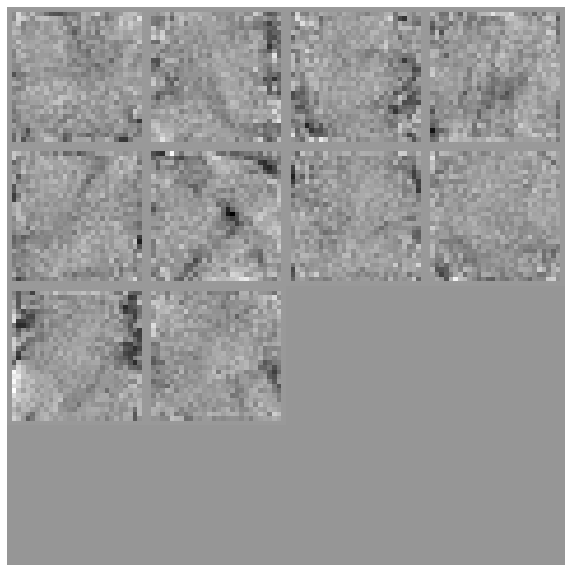

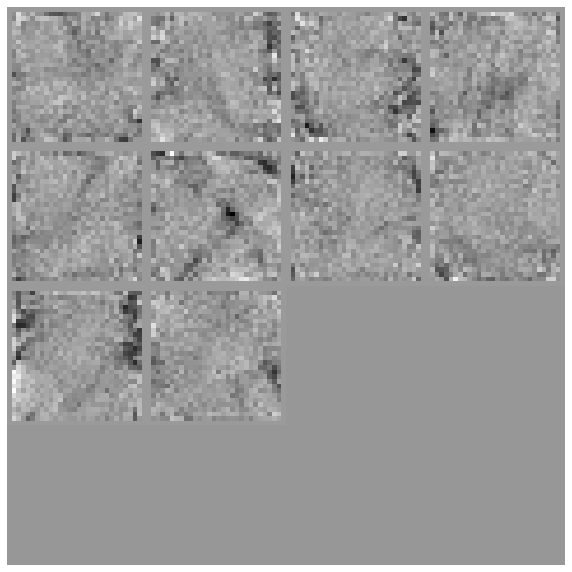

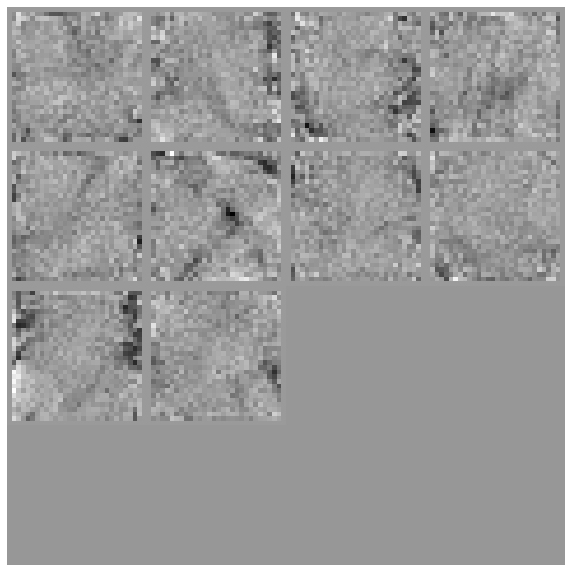

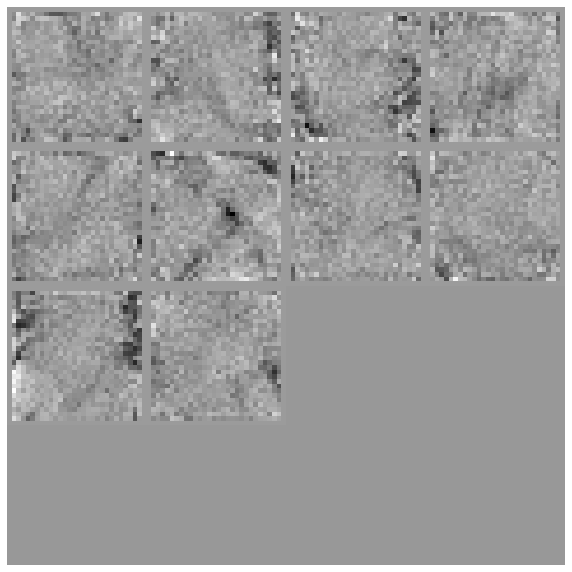

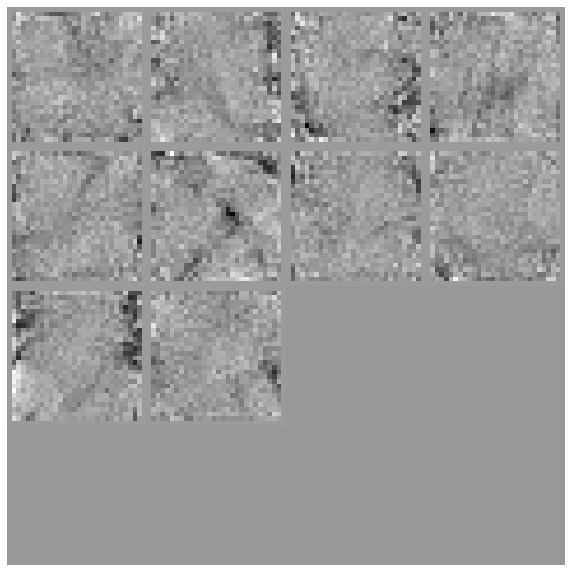

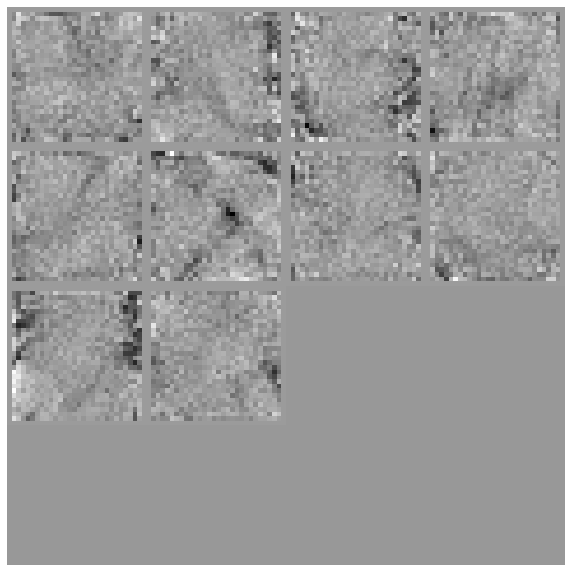

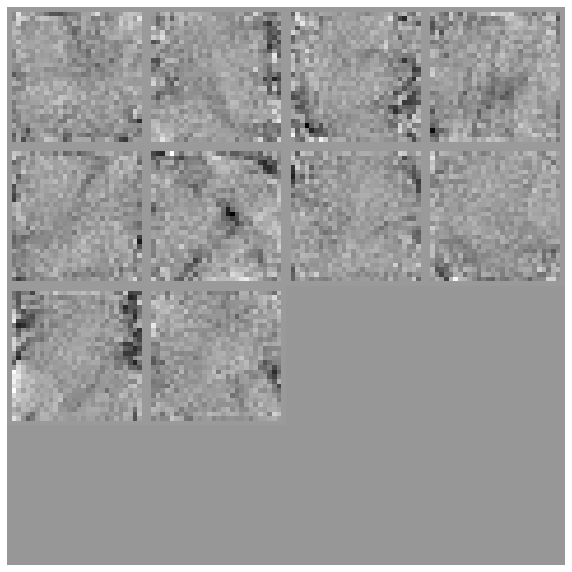

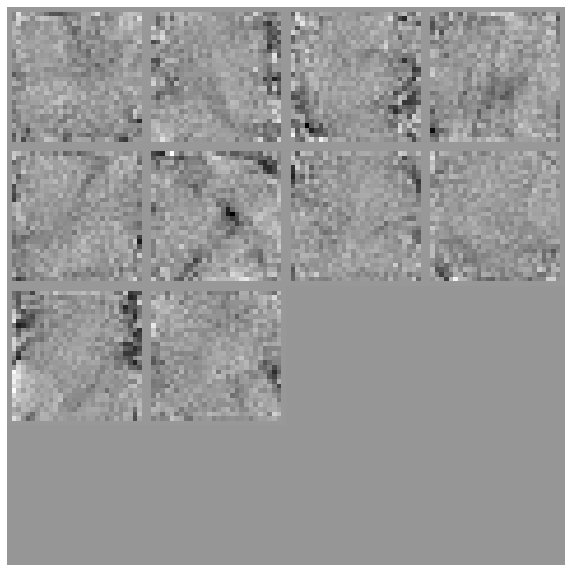

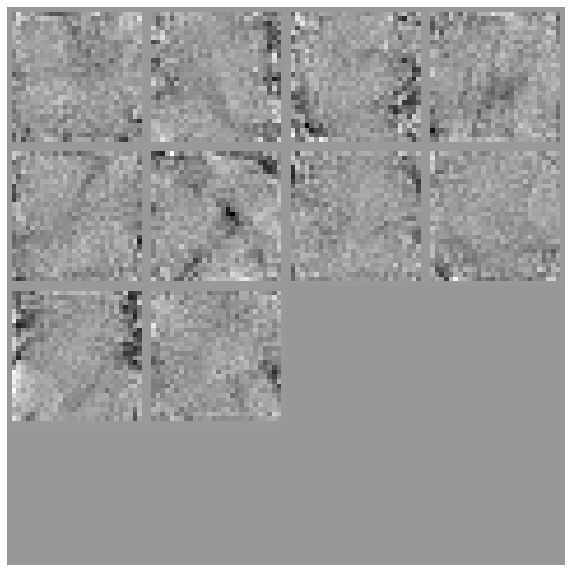

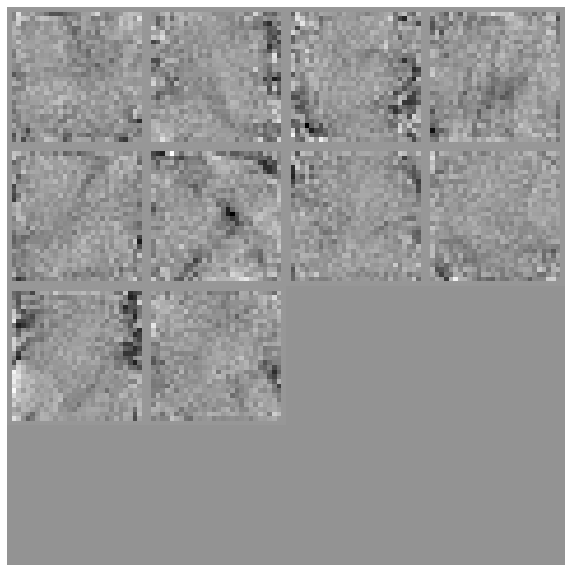

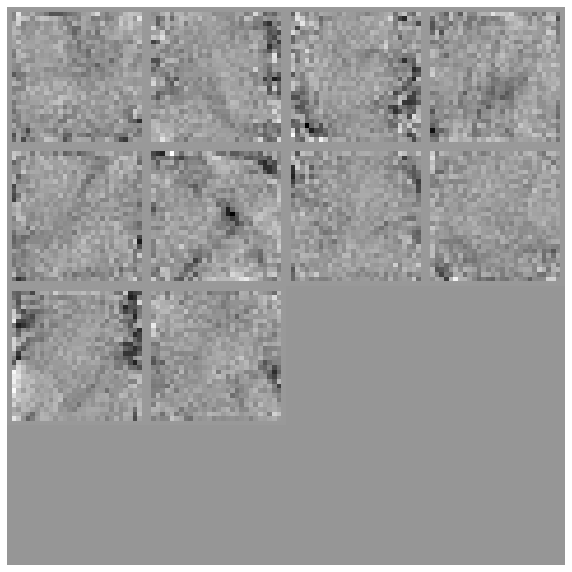

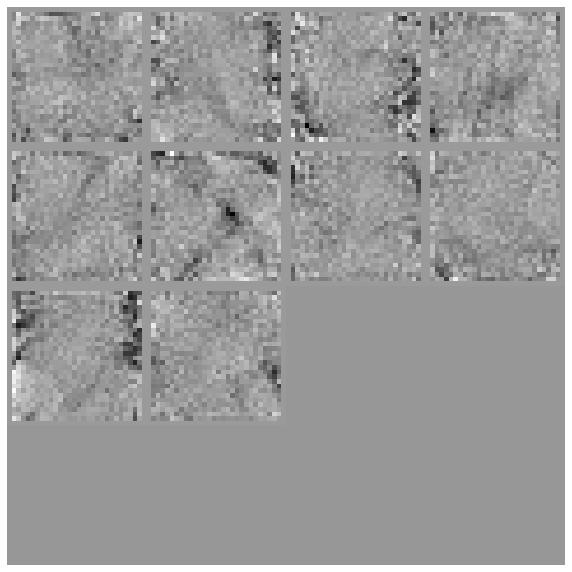

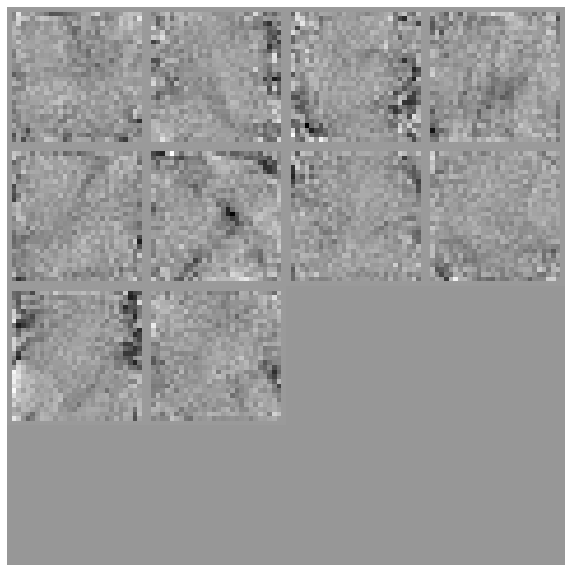

In [ ]:
wb.init(project="Simple_Linear_Adam_KMNIST"); #makes a chart for us and how well is out classification happening
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 100000 #how many times we run it

w = [GPU(Truncated_Normal((784,10)))] #starts our model randomly

optimizer = torch.optim.Adam(w, lr=c.h)  #update w 

for i in range(c.epochs):

    x,y = get_batch('train') #gets a small batch of the data

    loss = cross_entropy(softmax(model(x,w)),y) #softmax makes sure everything adds up

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() #use the loss function to update w 
   
    wb.log({"loss": loss})

    make_plots()

    if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing